<a href="https://colab.research.google.com/github/afham123/Natural-language-Processing/blob/main/Movie_Review_positive_or_negative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving moviereviews.tsv to moviereviews.tsv


In [11]:
df=pd.read_csv('moviereviews.tsv',sep='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [12]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [15]:
df.dropna(inplace=True)
df.isnull().sum()

label     0
review    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [17]:
df['label'].unique()

array(['neg', 'pos'], dtype=object)

In [19]:
df['label'].value_counts()

neg    983
pos    982
Name: label, dtype: int64

Vizualizing

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


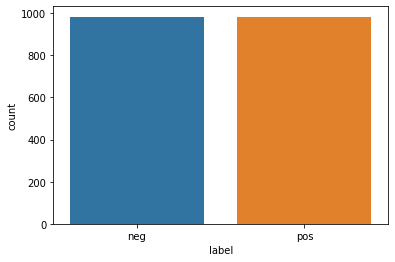

In [24]:
sns.countplot(df['label'])
plt.show()

In [26]:
print(df['review'][0])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
the plot , for what its worth , concerns two brothers ( nathan lane and an appalling lee evens ) who inherit a poorly run string factory and a seemingly worthless house from their eccentric father . 
deciding to check out the long-abandoned house , they soon learn that it's worth a fortune and set about selling it in auction to the highest bidder . 
but battling them at every turn is a very smart mouse , happy with his run-down little abode and wanting it to stay that way . 
the story alternates betwee

In [47]:
blanks=[]

for i,lb,rv in df.itertuples():
  if rv.isspace():
    blanks.append(i)

In [48]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [49]:
df.drop(blanks,inplace=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [51]:
X=df['review']
y=df['label']

In [52]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf=Pipeline([('tfid',TfidfVectorizer()),('clf',LinearSVC())],verbose=1)
text_clf.fit(X_train,y_train)

[Pipeline] .............. (step 1 of 2) Processing tfid, total=   0.7s
[Pipeline] ............... (step 2 of 2) Processing clf, total=   0.1s


Pipeline(memory=None,
         steps=[('tfid',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                

In [54]:
predictions=text_clf.predict(X_test)

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         neg       0.85      0.85      0.85       295
         pos       0.85      0.84      0.84       287

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582



In [56]:
print(confusion_matrix(y_test,predictions))

[[251  44]
 [ 46 241]]


In [57]:
print(accuracy_score(y_test,predictions))

0.845360824742268
